In [1]:
import torch
from common import get_cfg, prepare_val
import numpy as np
import cv2
import matplotlib.pyplot as plt

DATASET_DIR = '/media/hcis-s20/SRL/nuscenes/trainval/'
vehicle_idx = [4, 5, 6, 7, 8, 10, 11,12]
DYNAMIC = [
    'car', 'truck', 'bus',
    'trailer', 'construction_vehicle',
    'pedestrian',
    'motorcycle', 'bicycle',
    # 'emergency',
]
torch.autograd.set_detect_anomaly(True)

In [2]:
version = 'cvt_labels_nuscenes_v1'
cfg1 = get_cfg(DATASET_DIR, version, 'Ours') # cvt_nuscenes_multiclass Sparse
device = torch.device('cuda:0') # cuda:5
model_version = '2024_0814_000439'
CHECKPOINT_PATH = None
CHECKPOINT_PATH = '../logs/cross_view_transformers_test/' + model_version +'/checkpoints/last.ckpt'
model, network, loader, viz, _ = prepare_val(cfg1, device, CHECKPOINT_PATH, mode='split', batch_size=4)

/media/hcis-s20/SRL/cross_view_ae/cross_view_transformers/scripts/common.py:50: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path='../config')
/media/hcis-s20/SRL/cross_view_ae/cross_view_transformers/scripts/common.py:14: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path='./config')


Loaded pretrained weights for efficientnet-b4
Dataset length: 49
Loaded checkpoint.


In [3]:
network.to(device)
model.to(device)
model.metrics.reset()
with_grad = True

if with_grad:
    network.train()
    # with torch.no_grad():
    for i,batch in enumerate(loader):
        print(i,end='\r')
        if i != 0:
            continue
        for k, v in batch.items():
            if isinstance(v, torch.Tensor):
                batch[k] = v.to(device)
            elif isinstance(v, list):
                if isinstance(v[0], torch.Tensor):
                    batch[k] = [i.to(device) for i in v]
            else:
                batch[k] = v
        pred = network(batch)
        loss = model.loss_func(pred,batch)
        loss[0].backward()
        vis_result = viz(batch,pred)
        break
else:
    network.eval()
    with torch.no_grad():
        for i,batch in enumerate(loader):
            print(i,end='\r')
            for k, v in batch.items():
                if isinstance(v, torch.Tensor):
                    batch[k] = v.to(device)
                elif isinstance(v, list):
                    if isinstance(v[0], torch.Tensor):
                        batch[k] = [i.to(device) for i in v]
                else:
                    batch[k] = v
            pred = network(batch)
            loss = model.loss_func(pred,batch)
            vis_result = viz(batch,pred)
    # if i ==5:
    
            break   
model.metrics.update(pred,batch)


In [4]:
if CHECKPOINT_PATH is None:
    for name, param in model.named_parameters():
        if param.requires_grad and param.grad is None:
            print(name)

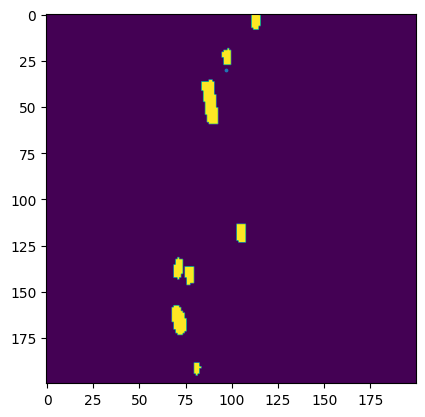

In [5]:
plt.imshow(((pred['VEHICLE'][0,0].sigmoid().detach().cpu())>0.5).numpy())
plt.scatter([97],[30], s=3)

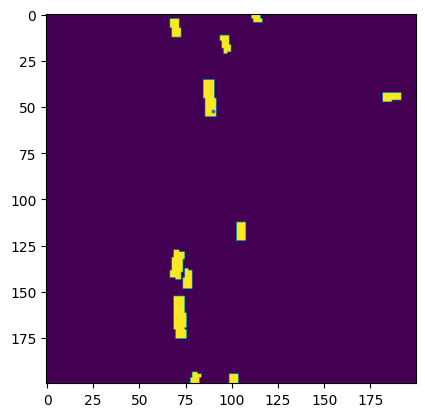

In [6]:
vehicle_idx = [[4,5,6,7,8,10,11]]
vehicles = [batch['bev'][:, idx].max(1, keepdim=True).values for idx in vehicle_idx]
vehicles = torch.cat(vehicles, 1)
plt.imshow(vehicles[0,0].cpu().numpy())
plt.scatter([90],[52], s=3)

tensor([1.1540, 1.1624, 1.1051, 1.1521, 1.1139, 1.1281, 1.1574, 1.1534],
       device='cuda:0', grad_fn=<SelectBackward0>)


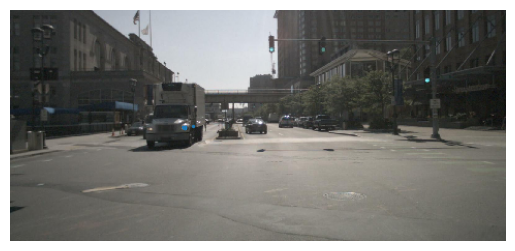

In [7]:
# mean height supervised
# x = [[[0.4953, 0.5759]],

#         [[0.5010, 0.4154]],

#         [[0.4945, 0.3754]],

#         [[0.4951, 0.5243]],

#         [[0.4952, 0.5507]],

#         [[0.4949, 0.4746]],

#         [[0.4952, 0.4506]],

#         [[0.4962, 0.6852]]]

x = [[[0.3509, 0.5044]],

        [[0.3513, 0.5032]],

        [[0.3507, 0.5097]],

        [[0.3473, 0.5047]],

        [[0.3514, 0.5098]],

        [[0.3517, 0.5076]],

        [[0.3683, 0.5030]],

        [[0.3520, 0.5044]]]

x = np.array(x)[:,0]
x[:, 0] *= 480
x[:, 1] *= 224
print(pred['height'][0,:,52, 90])
# x = x[2:6]
plt.imshow(batch['image'][0,1].cpu().permute(1,2,0))
plt.scatter(x[:,0],x[:,1],s=2)
plt.axis('off')
plt.show()

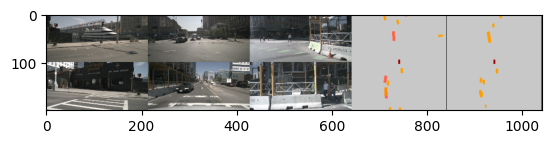

In [8]:
plt.imshow(vis_result[0])

In [9]:
np.linspace(0.3,0.6,31)

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ])

In [10]:
a = torch.tensor([2.0])
b = torch.tensor([True])
a * b

tensor([2.])